<a href="https://colab.research.google.com/github/Yashdalot/Covid19DataAnalysis/blob/alternate/Covid_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
res = requests.get("https://api.covid19india.org/data.json")
d=res.json()
time_series = d['cases_time_series']

In [2]:
import csv

with open('data_series.csv', 'w', newline='') as csvfile:
    fieldnames = time_series[0].keys()
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for obj in time_series :
      writer.writerow(obj)


In [3]:
import pandas as pd
import csv
ds = pd.read_csv("data_series.csv",encoding='latin-1')
statewise_data = d['statewise']

with open('data.csv', 'w', newline='') as csvfile:
    fieldnames = statewise_data[0].keys()
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for obj in statewise_data :
      writer.writerow(obj)
df = pd.read_csv("data.csv",encoding='latin-1')

                                     


#                                              Covid-19 Data Analysis

## Last Update time : - 

In [4]:
print(df['lastupdatedtime'][1])

11/08/2020 21:10:43


## Total Number of Cases in India = 

In [5]:
print("Recovered    :- " , df['recovered'][0])
print("Confirmed    :- " , df['confirmed'][0])
print("Active       :- " ,df['active'][0])
print("Total deaths :- " , df['deaths'][0])
print("\n\n\n\n\n")

Recovered    :-  1640369
Confirmed    :-  2332931
Active       :-  645873
Total deaths :-  46216








In [6]:

daily_jump=[]
daily_recovered=[]
daily_deaths=[]
for i in range(1,len(ds)):
  x = ds['totalconfirmed'][i] - ds['totalconfirmed'][i-1]
  daily_jump.append(x)
  x = ds['totalrecovered'][i] - ds['totalrecovered'][i-1]
  daily_recovered.append(x)
  x = ds['totaldeceased'][i] - ds['totaldeceased'][i-1]
  daily_deaths.append(x)

## **One day Statistics**


---





In [7]:
print("Yesterday's one Day Jump       " ,daily_jump[-1] )
print("Yesterday's one Day Recoverd   " ,daily_recovered[-1] )
print("Yesterday's one Day Deaths     " ,daily_deaths[-1] )
print("\n\n\n\n")

Yesterday's one Day Jump        61252
Yesterday's one Day Recoverd    56461
Yesterday's one Day Deaths      835







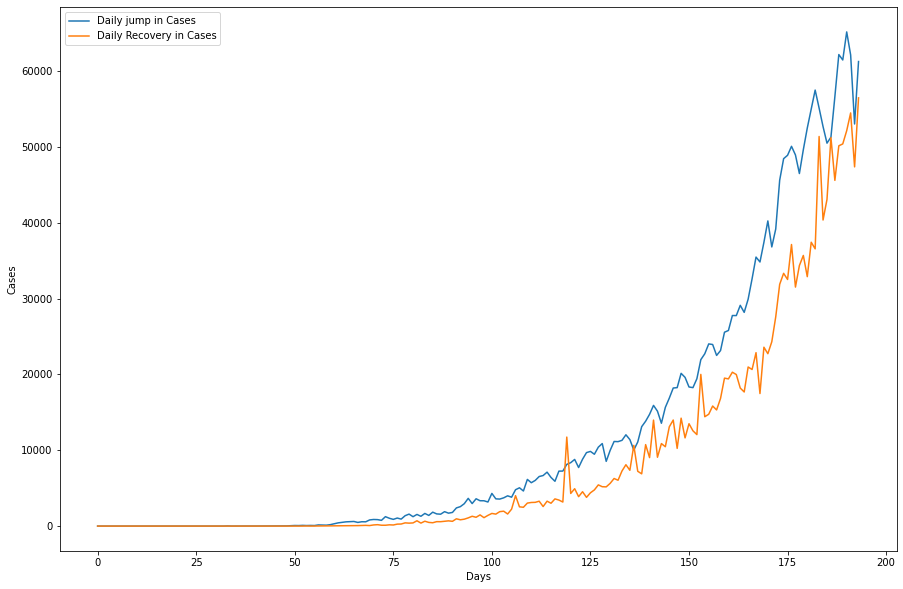

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(range(len(daily_jump)) ,  daily_jump, label = 'Daily jump in Cases')
plt.plot(range(len(daily_recovered)) ,  daily_recovered, label = 'Daily Recovery in Cases')
plt.xlabel("Days")
plt.ylabel("Cases")
plt.legend()
plt.show()

In [9]:
print("\n\n\n\n")

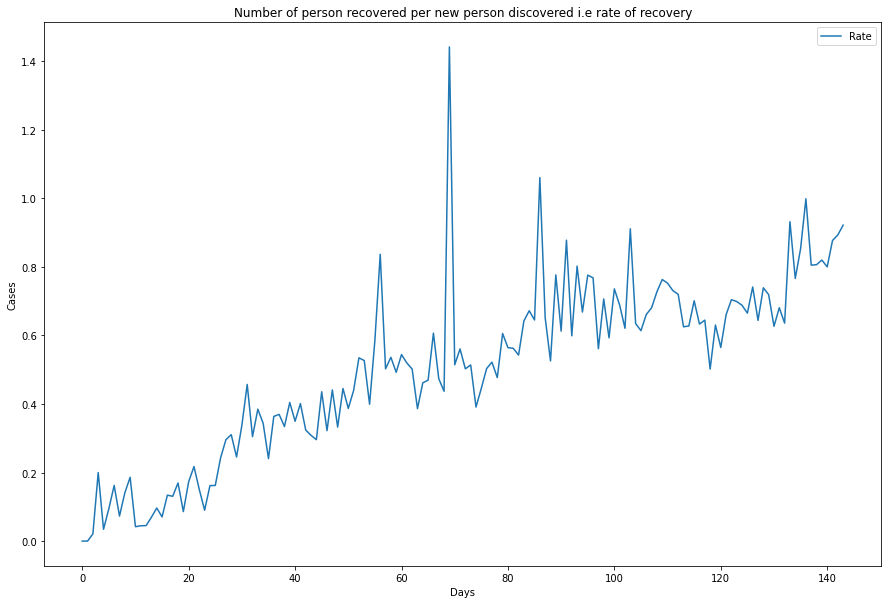

In [20]:
import math
r =[j/(i+math.exp(.00000000000008)) for i,j in zip(daily_jump , daily_recovered)]
plt.figure(figsize=(15,10))
plt.plot(range(len(r[50:])) , r[50:], label = 'Rate')
# plt.plot(range(len(daily_recovered)) ,  daily_recovered, label = 'Daily Recovery in Cases')
plt.title("Number of person recovered per new person discovered i.e rate of recovery")
plt.xlabel("Days")
plt.ylabel("Cases")
plt.legend()
plt.show()

In [ ]:
print("\n\n\n\n")

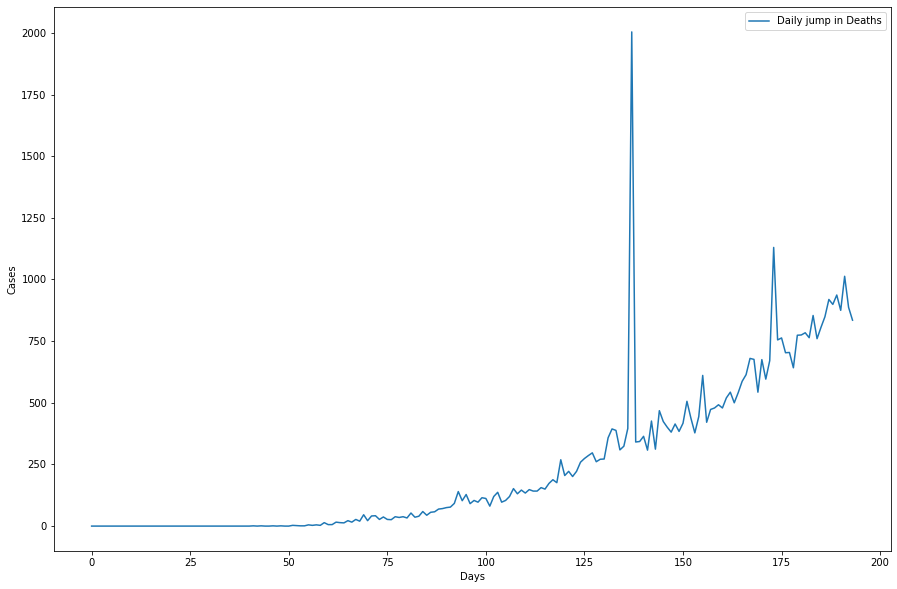

In [10]:
plt.figure(figsize=(15,10))
plt.plot(range(len(daily_deaths)) ,daily_deaths,   label = 'Daily jump in Deaths')
plt.xlabel("Days")
plt.ylabel("Cases")
plt.legend()
plt.show()


# Top 5 states with the most number of cases Active

In [11]:
top= df.sort_values(by ='confirmed' , ascending=False)
print("{:<0}".format("No."),end="          ")
print("{:<5}".format('State'),end="          ")
print("{:<7}".format('Confirmed'),end="          ")
print("{:<10}".format('Active'),end="          ")
print("{:<7}".format('Deaths'))
for i in range(1,6):
    print(i ,end="          ")
    print("{:<20}".format(top['state'][i]),end="")
    print("{:<17}".format(top['confirmed'][i]),end="")
    print("{:<20}".format(top['active'][i]),end="")
    print("{:<10}".format(top['deaths'][i]))
    

No.          State          Confirmed          Active              Deaths 
1          Maharashtra         535601           148553              18306     
2          Tamil Nadu          308649           52810               5159      
3          Delhi               147391           10868               4139      
4          Karnataka           188611           79605               3398      
5          Andhra Pradesh      244549           87597               2203      


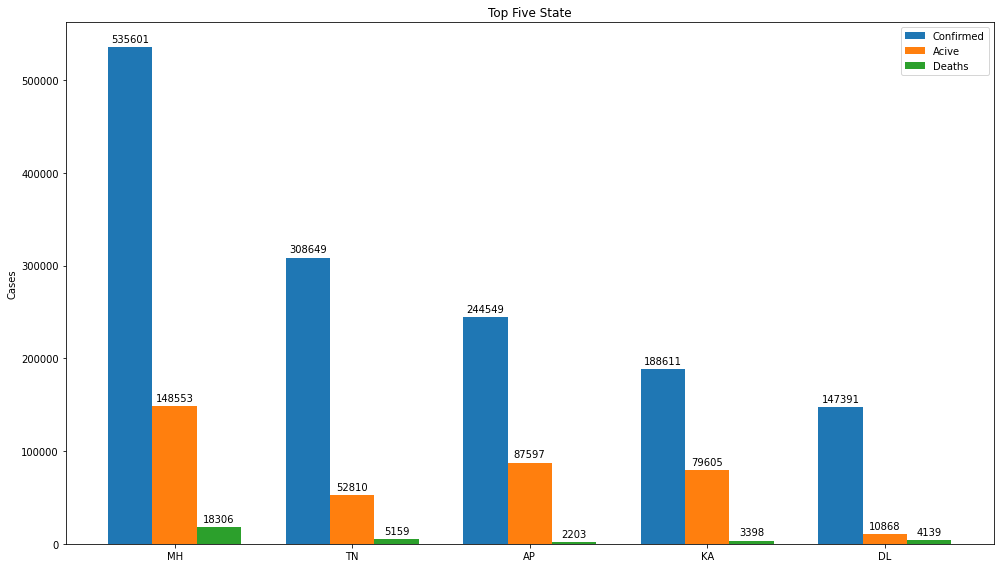

In [22]:
from matplotlib import pyplot as plt
import numpy as np
top=top[1:6]
x = np.arange(len(top["state"]))  # the label locations
width = 0.25 # the width of the bars

fig, ax = plt.subplots(figsize=(14,8))
rects1 = ax.bar(x - width, top["confirmed"], width, label='Confirmed')
rects2 = ax.bar(x , top["active"], width, label='Acive')
rects3 = ax.bar(x + width, top["deaths"], width, label='Deaths')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cases')
ax.set_title('Top Five State')
ax.set_xticks(x)
labels = top["statecode"]
ax.set_xticklabels(labels)
ax.legend()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

In [12]:
print("\n\n\n\n\n")

In [38]:
import requests
res = requests.get("https://api.covid19india.org/state_district_wise.json")
d=res.json()
l=['active', 'confirmed', 'deceased', 'recovered','district','state','statecode']

import csv

with open('data1.csv', 'w', newline='') as csvfile:
    fieldnames = l
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for state in d.keys():
      statecode = d[state]['statecode']
      for dist in d[state]['districtData'].keys():
        temp=dict()
        temp['active']  =  d[state]['districtData'][dist]['active']
        temp['confirmed']  =  d[state]['districtData'][dist]['confirmed']
        temp['deceased']  =  d[state]['districtData'][dist]['deceased']
        temp['recovered']  =  d[state]['districtData'][dist]['recovered']
        temp['district']  =  dist
        temp['state']  =  state
        temp['statecode']  =  statecode
        writer.writerow(temp)
        import pandas as pd
df1 = pd.read_csv("data1.csv",encoding='latin-1')

def maxcity(state):
  cities = df1[df1["state"]==state].dropna()["district"].unique()
  #print(cities)
  maxno=0
  c=pd.DataFrame()
  for city in cities:
    # print(city)
    n = df1[df1['district']==city]
    n=n[n['state']==state]
    if(maxno <= int(n['confirmed'])):
      maxno = int(n['confirmed'])
      c = n
  return c

d1={}
cases=[]
datafra=[]
i=0
for state in df1["state"].unique():
  # print(state)
  c = maxcity(state)
  # d1 = c.to_dict(orient ='' )
  cases=[]
  cases.append(int(c['active']));cases.append(int(c['confirmed']));cases.append(int(c['deceased']));cases.append(int(c['recovered']))
  cases.append(str(c['district']).split()[1]);cases.append(str(c['state']).split()[1]);cases.append(str(c['statecode']).split()[1])
  datafra.append(cases)

final_data = pd.DataFrame(datafra,columns = l,index=None)
top_dist = final_data.sort_values(by=['active','confirmed'],ascending=False,ignore_index=True)

**District with most number of cases**



In [39]:
top_dist= top_dist.sort_values(by ='confirmed' , ascending=False)
print("{:<}".format("No."),end="        ")
print("{:<3}".format("District"),end="       ")
print("{:<4}".format('State'),end="          ")
print("{:<7}".format('Confirmed'),end="        ")
print("{:<10}".format('Active'),end="      ")
print("{:<7}".format('Deaths'),end="     ")
print("{:<7}".format('recovered'))
for i in range(1,6):
    print(i ,end="          ")
    print("{:<15}".format(top_dist['district'][i]),end="")
    print("{:<17}".format(top_dist['state'][i]),end="")
    print("{:<15}".format(top_dist['confirmed'][i]),end="")
    print("{:<15}".format(top_dist['active'][i]),end="")
    print("{:<15}".format(top_dist['deceased'][i]),end="")
    print("{:<15}".format(top_dist['recovered'][i]))

No.        District       State          Confirmed        Active          Deaths      recovered
1          Bengaluru      Karnataka        77038          33070          1293           42674          
2          Mumbai         Maharashtra      125224         18887          6893           99147          
3          East           Andhra           34310          14252          233            19825          
4          Chennai        Tamil            111054         11133          2347           97574          
5          Unknown        Delhi            146603         10081          4138           132384         


In [15]:
print("\n\n\n\n")

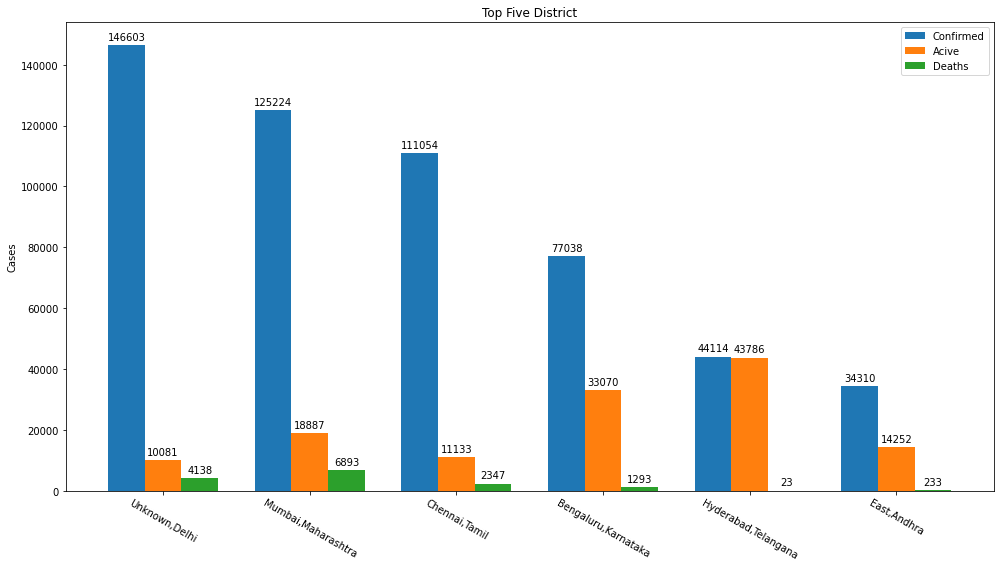

In [40]:

top_dist = top_dist[:6]
x = np.arange(len(top_dist["district"]))  # the label locations
width = 0.25 # the width of the bars

fig, ax = plt.subplots(figsize=(14,8))
rects1 = ax.bar(x - width, top_dist["confirmed"], width, label='Confirmed')
rects2 = ax.bar(x , top_dist["active"], width, label='Acive')
rects3 = ax.bar(x + width, top_dist["deceased"], width, label='Deaths')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cases')
ax.set_title('Top Five District')
ax.set_xticks(x)
labels = top_dist["district"] + "," +  top_dist["state"]
ax.set_xticklabels(labels , rotation = -30)
ax.legend()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

## Graphical Representaion

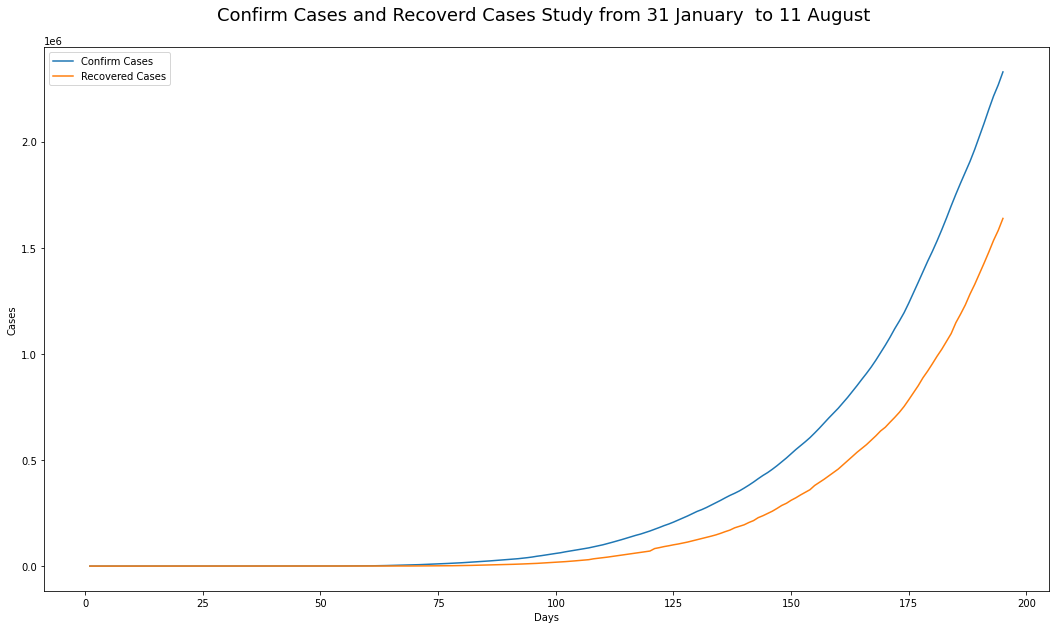

In [16]:
import matplotlib.pyplot as plt
ind = [i for i in range(1,len(ds)+1) ]
ds["index"] = ind
plt.figure(figsize=(18,10))
plt.title("Confirm Cases and Recoverd Cases Study from {} to {}\n".format(ds['date'][1] , ds['date'][ds.shape[0]-1]),fontsize=18)
plt.plot(ds['index'] ,  ds['totalconfirmed'], label = 'Confirm Cases')
plt.plot(ds['index'],  ds['totalrecovered'], label = 'Recovered Cases')
# plt.xticks(rotation=45,fontsize=1)
# plt.show()
plt.xlabel("Days")
plt.ylabel("Cases")
plt.legend()
plt.show()

In [17]:
print("\n\n\n\n")

### State Wise Chart

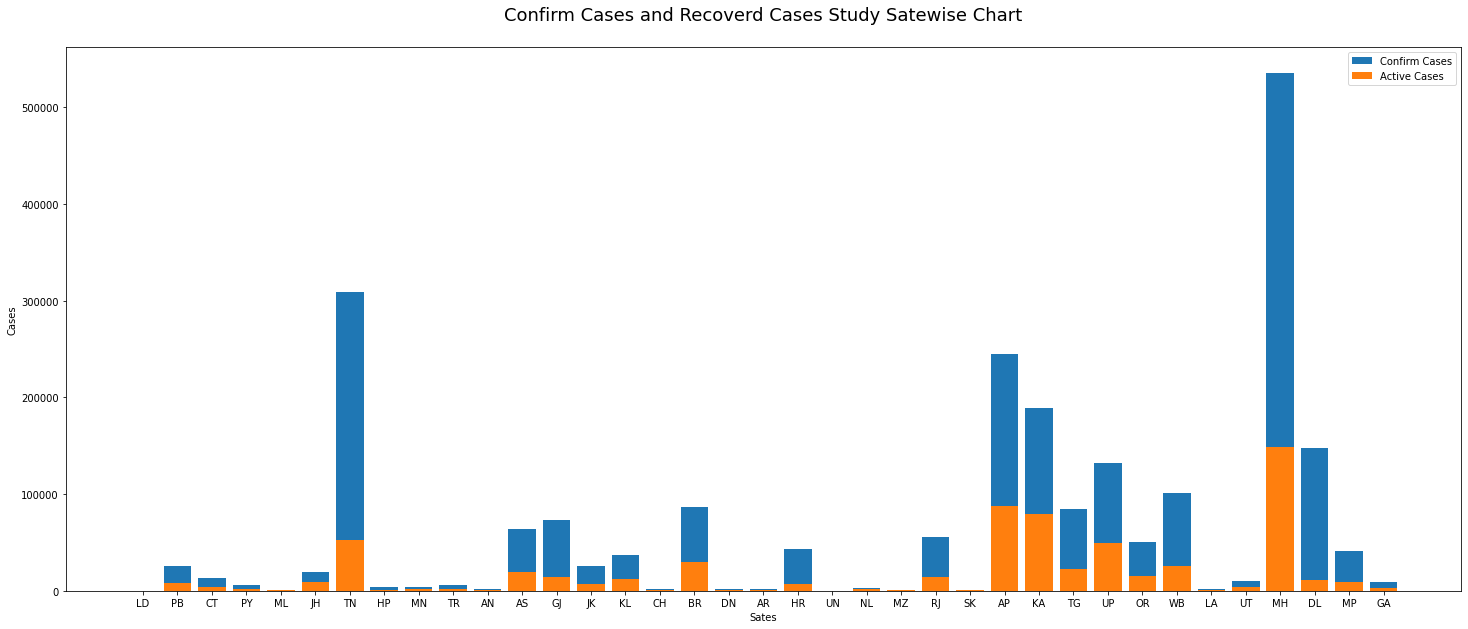

In [18]:
df1 = df[1:]
df1 = df1.sample(frac=1).reset_index(drop=True)
plt.figure(figsize=(25,10))
plt.title("Confirm Cases and Recoverd Cases Study Satewise Chart\n",fontsize=18)
plt.bar(df1['statecode'] ,  df1['confirmed'], label = 'Confirm Cases')
plt.bar(df1['statecode'],  df1['active'], label = 'Active Cases')
plt.xlabel("Sates")
plt.ylabel("Cases")
plt.legend()
# plt.rcParams["figure.figsize"] = (100,100)
plt.show()

### Created By Yash Patidar